<a href="https://colab.research.google.com/github/asif-raza01/ML/blob/main/PROJECT_EDA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#EDA

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
columns=['age', 'bmi', 'children','charges']

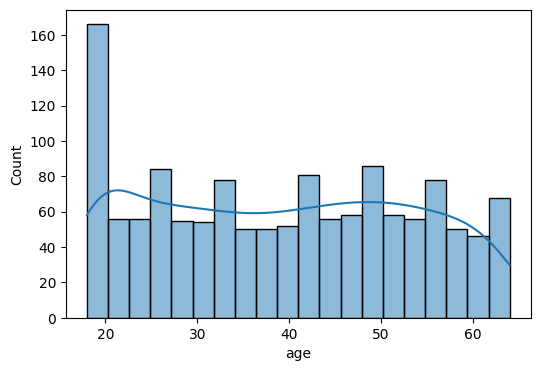

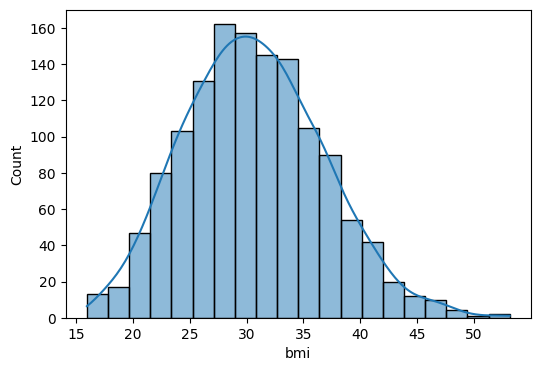

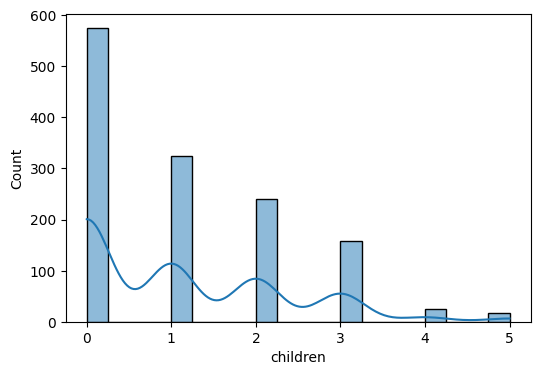

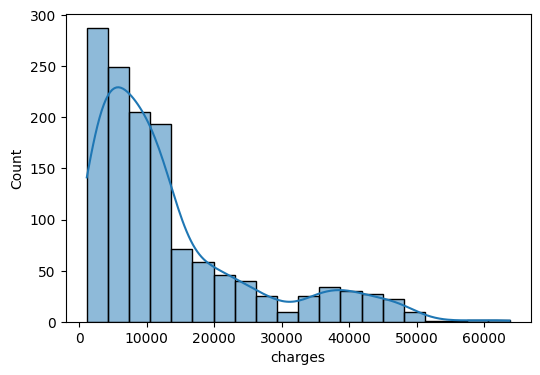

In [10]:
for col in columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col],kde=True,bins=20)
  plt.show()

<Axes: xlabel='children', ylabel='count'>

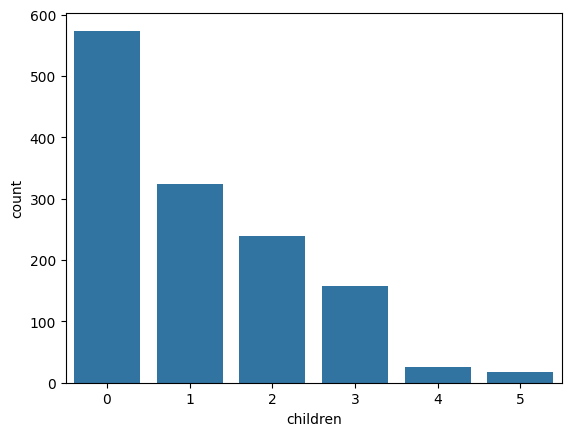

In [11]:
sns.countplot(x=df['children'])


<Axes: xlabel='sex', ylabel='count'>

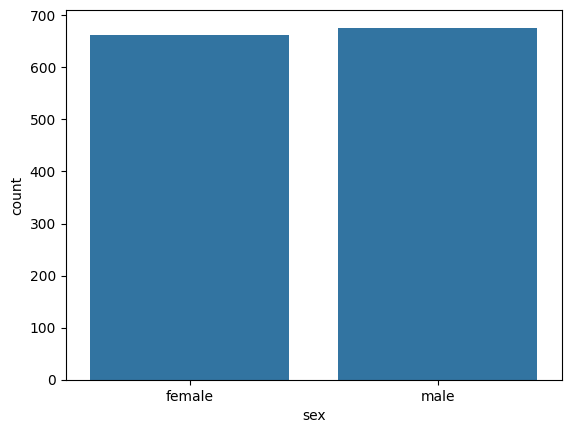

In [12]:
sns.countplot(x=df['sex'])


<Axes: xlabel='smoker', ylabel='count'>

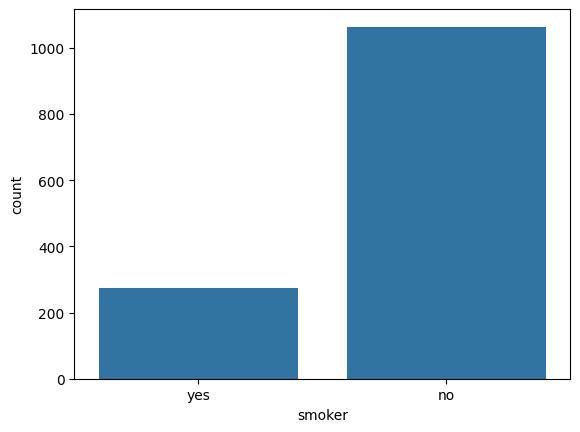

In [13]:
sns.countplot(x=df['smoker'])

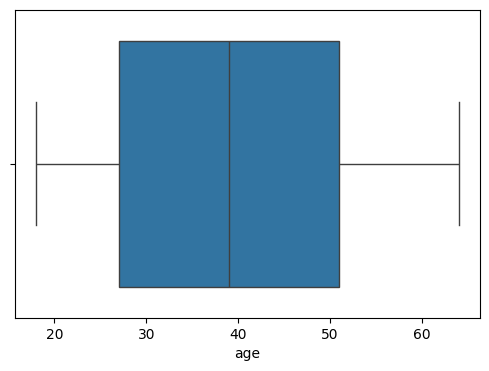

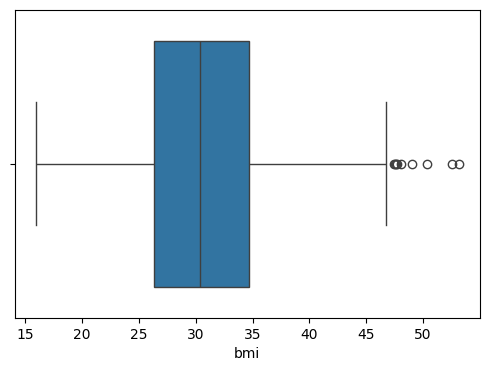

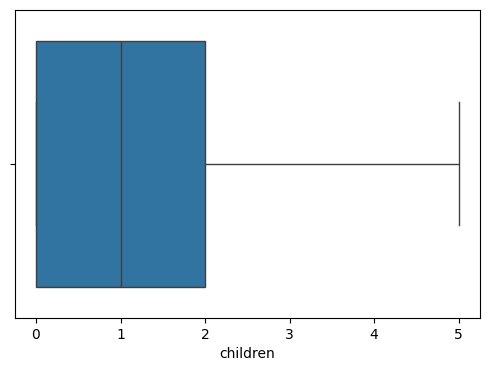

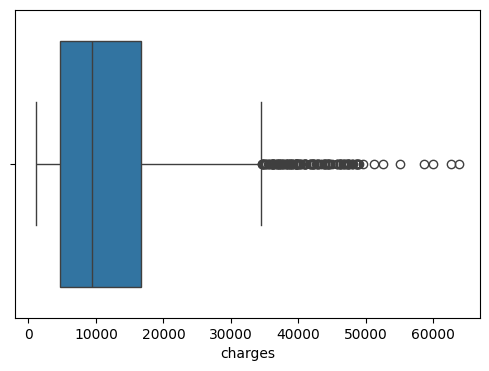

In [14]:
for col in columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])


<Axes: >

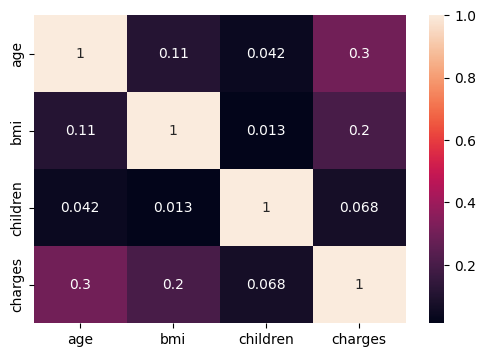

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)

#DATA CLEANING AND PREPROCESSING

In [16]:
df_cleaned=df.copy()

In [17]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df_cleaned.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [20]:
df_cleaned['sex'].value_counts()

,count
sex,
male,676
female,662


In [21]:
df_cleaned['sex']=df_cleaned['sex'].map({"male":0,"female":1})

In [22]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [23]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [24]:
df_cleaned['smoker']=df_cleaned['smoker'].map({"yes":1,"no":0})

In [25]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [26]:
df_cleaned.rename(columns={
    'sex' : 'is_female','smoker' : 'is_smoker'
},inplace=True)

In [27]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [28]:
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [29]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [30]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [31]:
df_cleaned=df_cleaned.astype(int)


In [32]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


#FEATURE ENGINEERING AND EXTRACTION

In [33]:
df_cleaned['bmi_category']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['underweight','healthy','overweight','obese']
)

In [34]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,overweight
1,18,0,33,1,0,1725,0,1,0,obese
2,28,0,33,3,0,4449,0,1,0,obese
3,33,0,22,0,0,21984,1,0,0,healthy
4,32,0,28,0,0,3866,1,0,0,overweight


In [35]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=True)

In [36]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_healthy,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False


In [37]:
df_cleaned=df_cleaned.astype(int)

In [38]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_healthy,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
cols=['age','bmi','children']
scaler=StandardScaler()
df_cleaned[cols]=scaler.fit_transform(df_cleaned[cols])

In [41]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_healthy,bmi_category_overweight,bmi_category_obese
0,-1.438764,1,-0.518122,-0.908614,1,16884,0,0,1,0,1,0
1,-1.509965,0,0.462657,-0.078767,0,1725,0,1,0,0,0,1
2,-0.797954,0,0.462657,1.580926,0,4449,0,1,0,0,0,1
3,-0.441948,0,-1.335438,-0.908614,0,21984,1,0,0,1,0,0
4,-0.513149,0,-0.354659,-0.908614,0,3866,1,0,0,0,1,0


In [42]:
from scipy.stats import pearsonr

#list of fearurtes to check against target here it is our charges

selected_features=['age', 'is_female', 'bmi', 'children', 'is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_healthy', 'bmi_category_overweight',
       'bmi_category_obese']


In [43]:
correlations={
    feature : pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df=pd.DataFrame(list(correlations.items()),columns=['feature','pearson correlation'])
correlation_df.sort_values(by='pearson correlation',ascending=False)


,feature,pearson correlation
4,is_smoker,0.787251
0,age,0.299009
10,bmi_category_obese,0.199533
2,bmi,0.196188
6,region_southeast,0.073981
3,children,0.067999
5,region_northwest,-0.039905
7,region_southwest,-0.043210
1,is_female,-0.057293
8,bmi_category_healthy,-0.103679


In [44]:
cat_features=['is_female','is_smoker',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_healthy', 'bmi_category_overweight',
       'bmi_category_obese']

In [45]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned ['charges_bin' ] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
  contingency = pd. crosstab(df_cleaned[col], df_cleaned ['charges_bin' ] )
  chi2_stat, p_val, _, _= chi2_contingency(contingency)
  decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
  chi2_results [col] = {
  'chi2_statistic': chi2_stat,
  'p_value': p_val,
  'Decision': decision
  }

In [46]:
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,854.020268,0.0,Reject Null (Keep Feature)
region_southeast,15.208814,0.001647,Reject Null (Keep Feature)
is_female,9.532132,0.022992,Reject Null (Keep Feature)
bmi_category_obese,8.510101,0.036566,Reject Null (Keep Feature)
region_southwest,5.530825,0.136807,Accept Null (Drop Feature)
bmi_category_overweight,4.620089,0.201826,Accept Null (Drop Feature)
bmi_category_healthy,3.578987,0.310661,Accept Null (Drop Feature)
region_northwest,1.226112,0.746749,Accept Null (Drop Feature)
